In [1]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('../MarketAnalytics/marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain Country  
0         1         0      SP  
1         1         0      CA  
2         0         0      US  
3         0         0     AUS  
4         1         0      SP

In [2]:
df.rename(columns={' Income ':'Income'},inplace=True)
df['Income']=df['Income'].str.replace('$','')
df['Income']=df['Income'].str.replace(',','')

df['Income']=df['Income'].astype('float')

### Section 01: Exploratory Data Analysis

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Text(0.5, 1.0, 'Income Distribution')

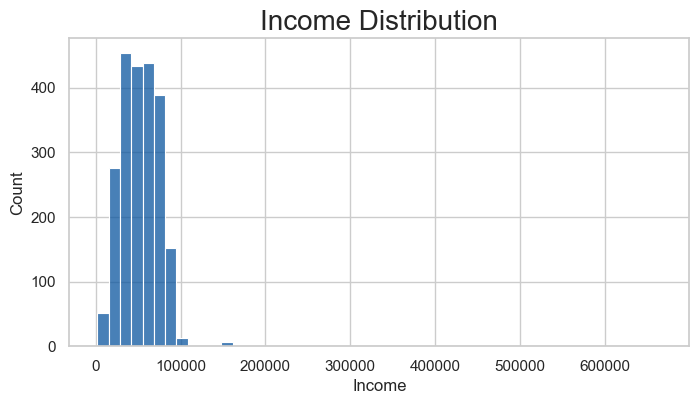

In [4]:
plt.figure(figsize=(8,4))
# df['Income'].plot(kind='hist',bins=50)
sns.histplot(x='Income',data=df,bins=50)
plt.title('Income Distribution',fontsize=20)

<Axes: >

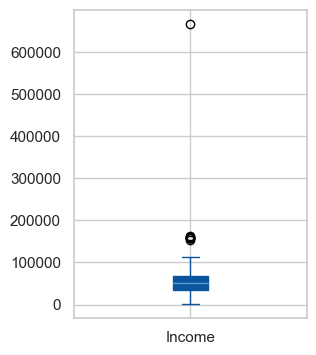

In [5]:
# plt.figure(figsize=(2,4))
df['Income'].plot(kind='box',figsize=(3,4),patch_artist=True)
# sns.boxplot(y='Income',data=df,orient='vertical')
# plt.title('Income Distribution',fontsize=20)

In [6]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Check for outliers

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

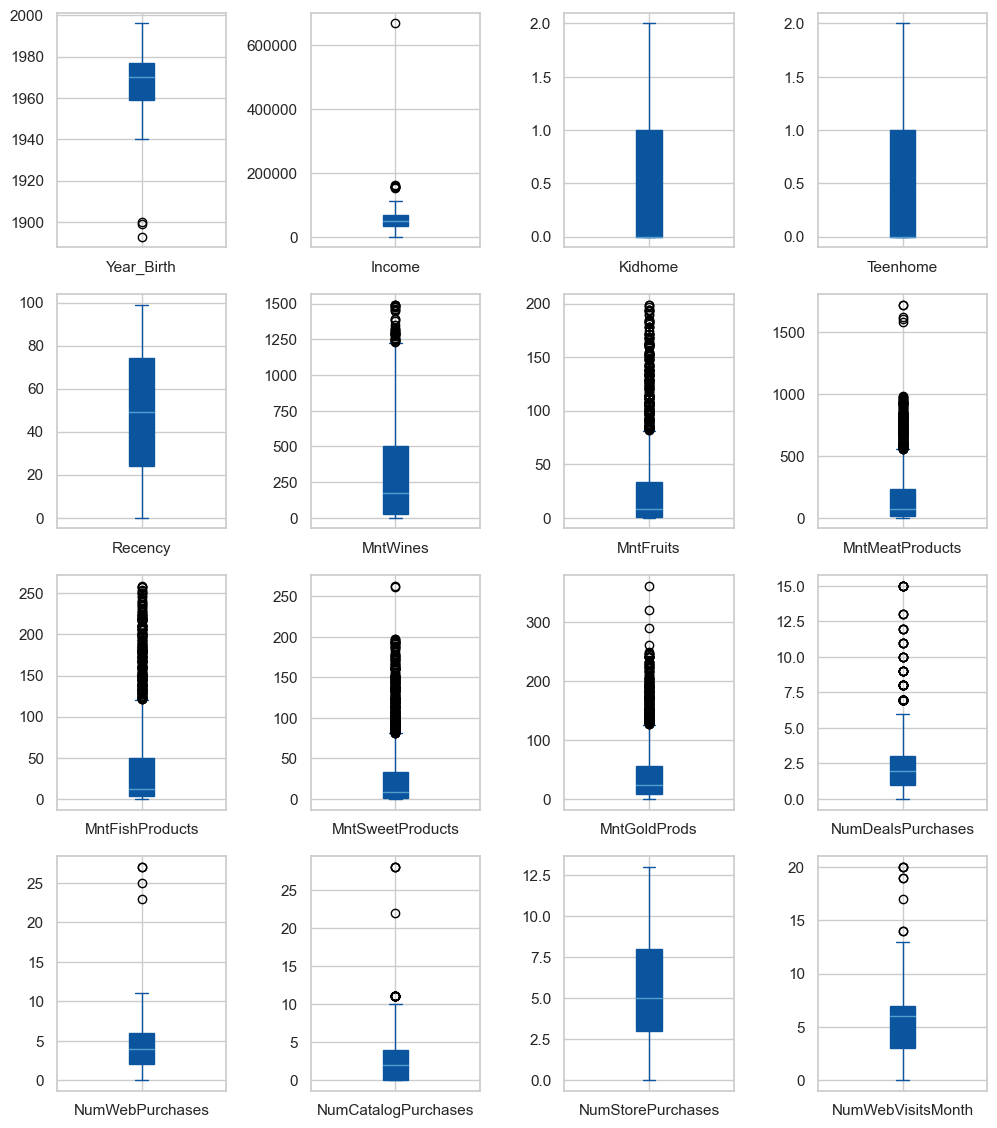

In [9]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

<Axes: >

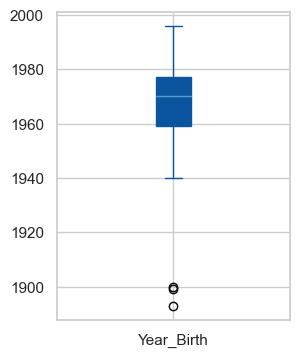

In [10]:
df['Year_Birth'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [11]:
df=df.loc[df['Year_Birth']>1900].reset_index(drop=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2232  10142        1976         PhD       Divorced  66476.0        0   
2233   5263        1977    2n Cycle        Married  31056.0        1   
2234     22        1976  Graduation       Divorced  46310.0        1   
2235    528        1978  Graduation        Married  65819.0        0   
2236   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0     6/16/14        0       189        104              379   
1            0     6/15/14        0       464          5               64   
2            1     5/13/14        0       134         11               59   
3            1     5/11/14        0        10          0                1   
4            0      4/8/14        0         6         16               24   
...        ...         ...      ...       ...        ...              ...   
2232         1      3/7/13       99       372         18              126   
2233         0     1/22/13       99         5         10               13   
2234         0     12/3/12       99       185          2               88   
2235         0    11/29/12       99       267         38              701   
2236         2      9/1/12       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 111               189           218                  1   
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
...               ...               ...           ...                ...   
2232               47                48            78                  2   
2233                3                 8            16                  1   
2234               15                 5            14                  2   
2235              149               165            63                  1   
2236              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   4                    4                  6   
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
...               ...                  ...                ...   
2232                5                    2                 11   
2233                1                    0                  3   
2234                6                    1                  5   
2235                5                    4                 10   
2236                8                    5                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2232                  4             0     

<Axes: >

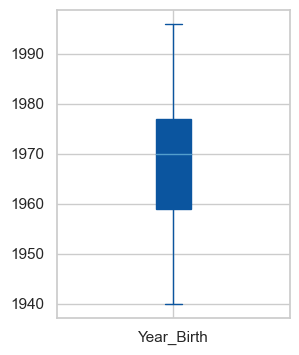

In [12]:
df['Year_Birth'].plot(kind='box', figsize=(3,4), patch_artist=True)


In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2232   2013-03-07
2233   2013-01-22
2234   2012-12-03
2235   2012-11-29
2236   2012-09-01
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [15]:
#Total number of dependents
df['Dependents'] = df['Kidhome']+df['Teenhome']

# The year of becoming a customer 
df['Year_Customer'] = 2020-df['Dt_Customer'].dt.year

#Total Amount spent
amt_lst = [col for col in df.columns if 'Mnt'  in col]
# print(amt_lst)

df['TotalMnt'] = df[amt_lst].agg('sum', axis=1)

#Total purchase
purchase_lst = [col for col in df.columns if 'Purchases'  in col]
# print(purchase_lst)

df['TotalPurchases'] = df[purchase_lst].agg('sum', axis=1)

#Total Campaigns
camp_lst = [col for col in df.columns if 'Cmp'  in col or 'Response' in col]
# print(camp_lst)

df['TotalCampaignAcc'] = df[camp_lst].agg('sum', axis=1)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-06-16        0       189        104              379              111   
1  2014-06-15        0       464          5               64                7   
2  2014-05-13        0       134         11               59               15   
3  2014-05-11        0        10          0                1                0   
4  2014-04-08        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  Dependents  Year_Customer  TotalMnt  TotalPurchases  \
0      SP           0              6      1190              15   
1      CA           0              6       577              18   
2      US           1              6       251              11   
3     AUS           2              6        11               4   
4      SP           1              6        91               8   

   TotalCampaignAcc  
0                 1  
1                 2  
2                 0  
3                 0  
4                 2

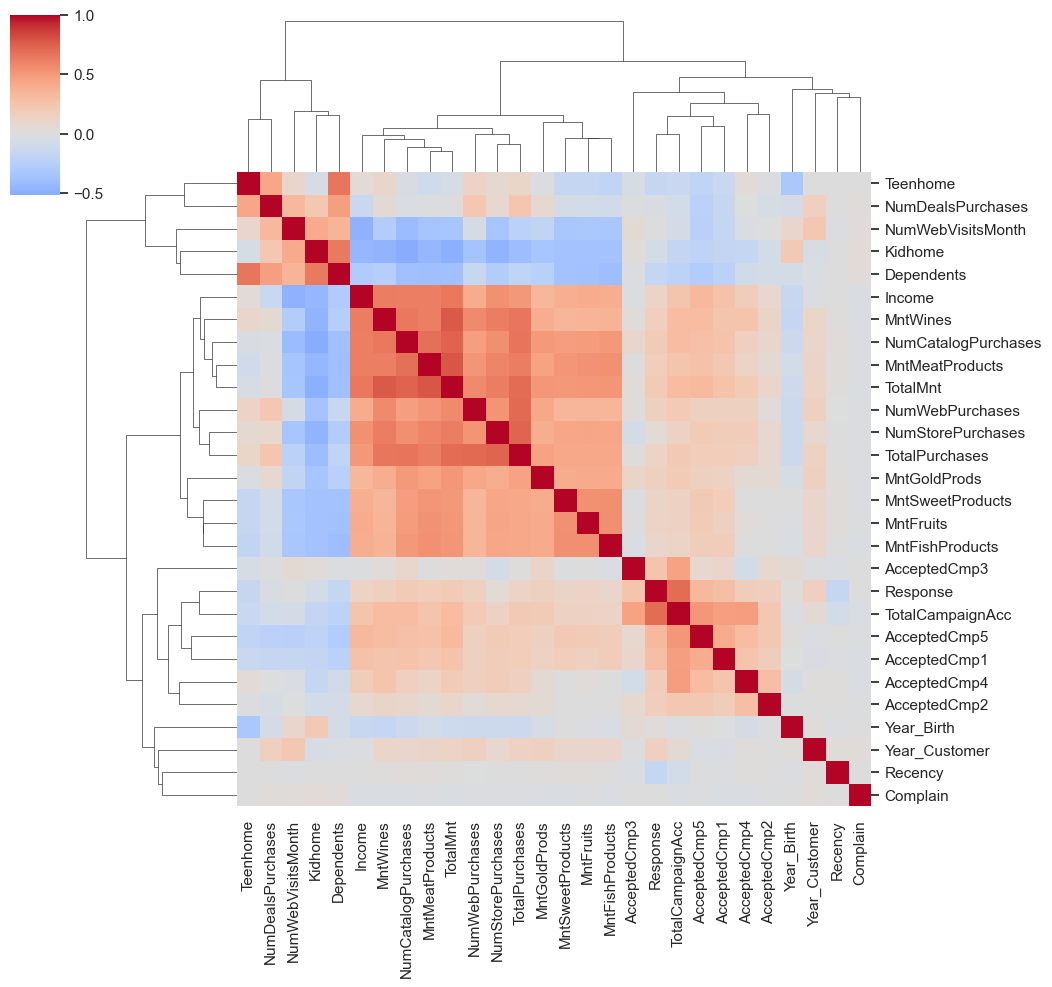

In [16]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

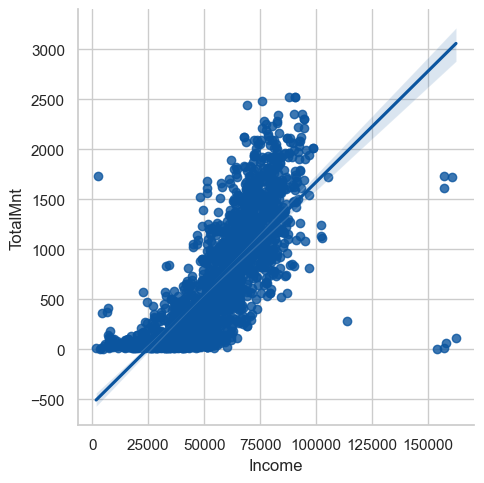

In [17]:
sns.lmplot(x='Income',y='TotalMnt',data=df[df['Income']<=200000])
# plt.xlim(0,200000)
# plt.ylim(-500,3000)

<Axes: xlabel='Dependents', ylabel='TotalMnt'>

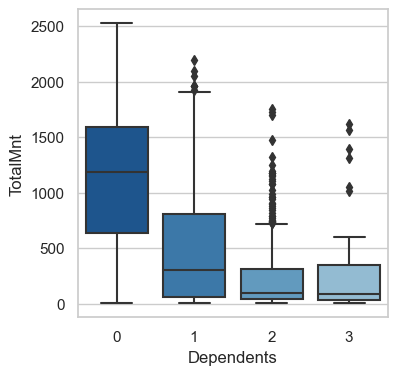

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents',y='TotalMnt',data=df)

<Axes: xlabel='Dependents', ylabel='NumDealsPurchases'>

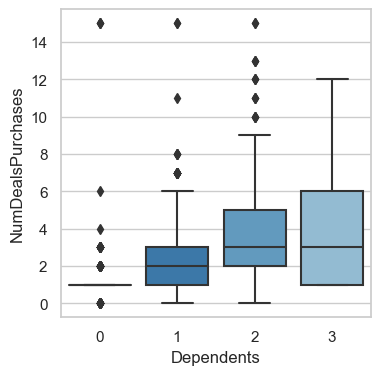

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents',y='NumDealsPurchases',data=df)

<Axes: xlabel='Dependents', ylabel='NumWebVisitsMonth'>

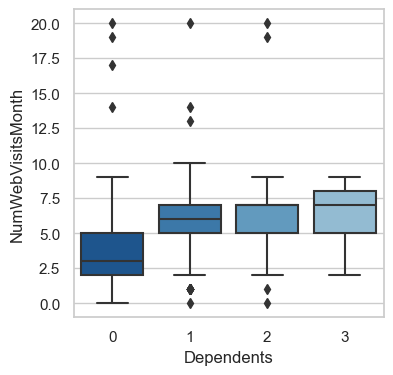

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents',y='NumWebVisitsMonth',data=df)

<Axes: xlabel='Dependents', ylabel='TotalCampaignAcc'>

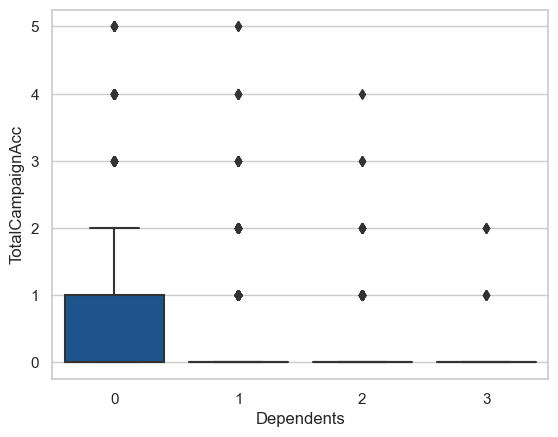

In [21]:
sns.boxplot(y='TotalCampaignAcc',x='Dependents',data=df)

<Axes: xlabel='TotalCampaignAcc', ylabel='Income'>

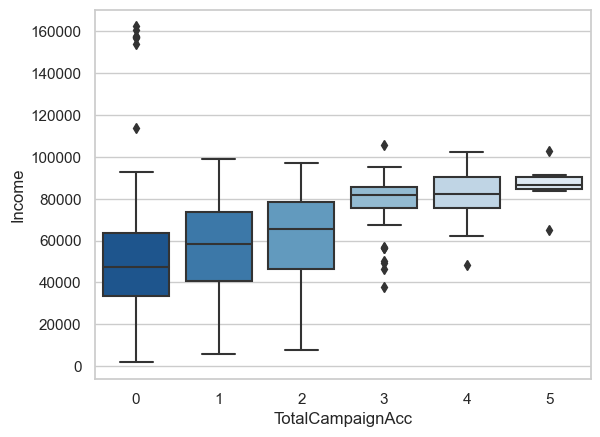

In [22]:
sns.boxplot(x='TotalCampaignAcc',y='Income',data=df[df['Income']<=200000])

In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignAcc'],
      dtype='object')

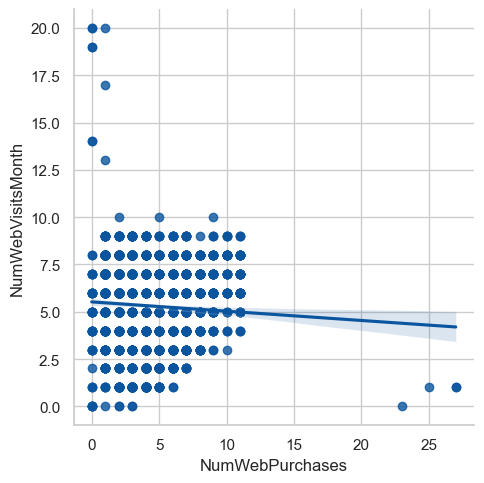

In [24]:
sns.lmplot(x='NumWebPurchases',y='NumWebVisitsMonth',data=df)

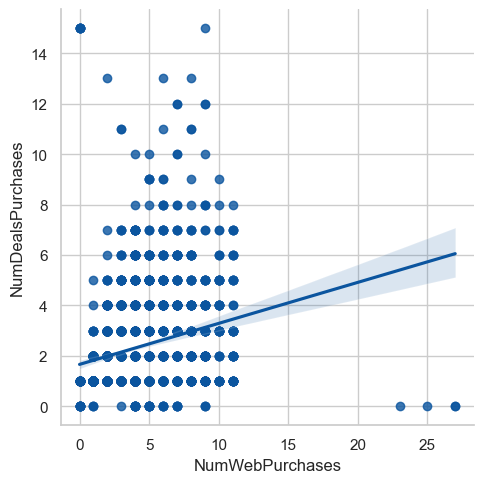

In [25]:
sns.lmplot(x='NumWebPurchases',y='NumDealsPurchases',data=df)

## Statistical Analysis

In [26]:
df['NumStorePurchases'].max()

13

Text(0.5, 1.0, 'NumStorePurchases Distribution')

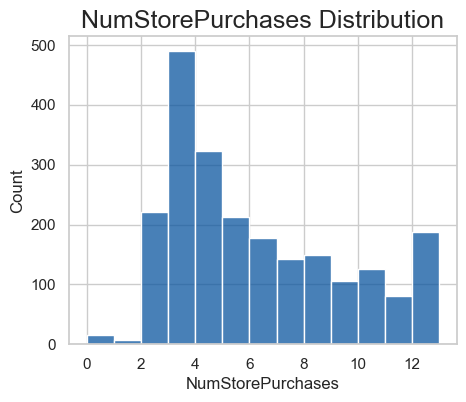

In [27]:
plt.figure(figsize=(5,4))
sns.histplot(x='NumStorePurchases',data=df,bins=13)
plt.title('NumStorePurchases Distribution',fontsize=18)

In [28]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-06-16        0       189        104              379              111   
1  2014-06-15        0       464          5               64                7   
2  2014-05-13        0       134         11               59               15   
3  2014-05-11        0        10          0                1                0   
4  2014-04-08        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  Dependents  Year_Customer  TotalMnt  TotalPurchases  \
0      SP           0              6      1190              15   
1      CA           0              6       577              18   
2      US           1              6       251              11   
3     AUS           2              6        11               4   
4      SP           1              6        91               8   

   TotalCampaignAcc  
0                 1  
1                 2  
2                 0  
3                 0  
4                 2

In [29]:
#Drop uninformative features
df.drop(columns=['ID','Dt_Customer'],inplace=True)

In [30]:
#One-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

cat=df.select_dtypes(exclude=np.number)

print('Number of unique values per categorical feature:\n',cat.nunique())

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


In [31]:
enc =OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names_out(cat.columns)
# get_feature_names(cat.columns)

In [32]:
#Merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded,num],axis=1)
df2.head()

Education_2n Cycle  Education_Basic  Education_Graduation  \
0                 0.0              0.0                   1.0   
1                 0.0              0.0                   1.0   
2                 0.0              0.0                   1.0   
3                 0.0              0.0                   1.0   
4                 0.0              0.0                   1.0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0               0.0            0.0                    0.0   
1               0.0            0.0                    0.0   
2               0.0            0.0                    0.0   
3               0.0            0.0                    0.0   
4               0.0            0.0                    0.0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                   0.0                      1.0                     0.0   
1                   0.0                      0.0                     0.0   
2                   0.0                      0.0                     1.0   
3                   0.0                      0.0                     0.0   
4                   0.0                      0.0                     0.0   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                    0.0                      0.0                   0.0   
1                    1.0                      0.0                   0.0   
2                    0.0                      0.0                   0.0   
3                    0.0                      1.0                   0.0   
4                    1.0                      0.0                   0.0   

   Marital_Status_YOLO  Country_AUS  Country_CA  Country_GER  Country_IND  \
0                  0.0          0.0         0.0          0.0          0.0   
1                  0.0          0.0         1.0          0.0          0.0   
2                  0.0          0.0         0.0          0.0          0.0   
3                  0.0          1.0         0.0          0.0          0.0   
4                  0.0          0.0         0.0          0.0          0.0   

   Country_ME  Country_SA  Country_SP  Country_US  Year_Birth   Income  \
0         0.0         0.0         1.0         0.0        1970  84835.0   
1         0.0         0.0         0.0         0.0        1961  57091.0   
2         0.0         0.0         0.0         1.0        1958  67267.0   
3         0.0         0.0         0.0         0.0        1967  32474.0   
4         0.0         0.0         1.0         0.0        1989  21474.0   

   Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0        0         0        0       189        104              379   
1        0         0        0       464          5               64   
2        0         1        0       134         11               59   
3        1         1        0        10          0                1   
4        1         0        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0      

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  8.752726658809282e-13
Median value of target variable:  5.0


In [34]:
#Identify the features that significantly affect the number of store purchases
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

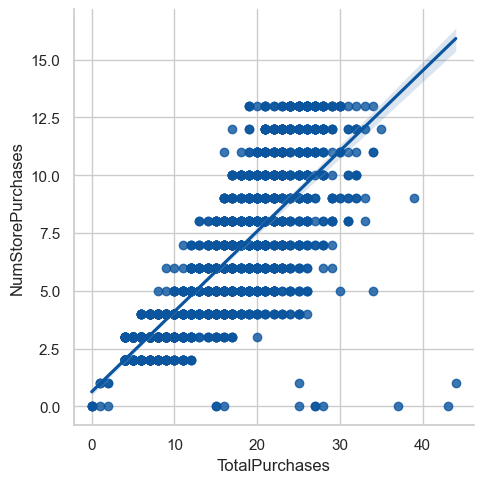

In [35]:
sns.lmplot(x='TotalPurchases',y='NumStorePurchases',data=df)

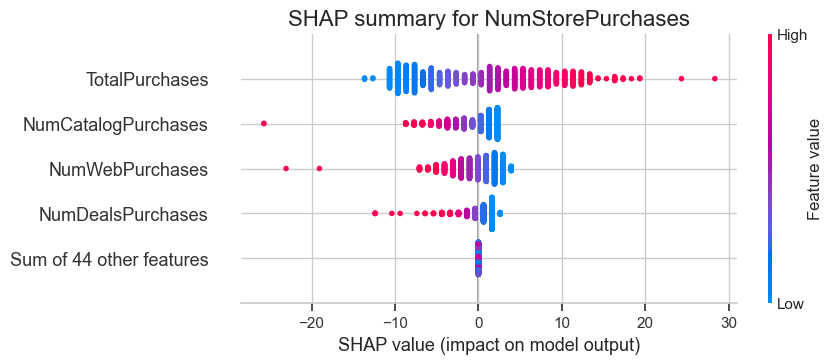

In [36]:
# Explore the directionality of these effects, using SHAP values:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

### Does US fare significantly better than the Rest of the World in terms of total purchases?

In [37]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       189        104              379              111               189   
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  6                  1             0             0   
1                  7                  5             0             0   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain Country  \
0             0             0             0         1         0      SP   
1             0             0             1         1         0      CA   
2             0             0             0         0         0      US   
3             0             0             0         0         0     AUS   
4             0             0             0         1         0      SP   

   Dependents  Year_Customer  TotalMnt  TotalPurchases  TotalCampaignAcc  
0           0              6      1190              15                 1  
1           0              6       577              18                 2  
2           1              6       251              11                 0  
3           2              6        11               4                 0  
4           1              6        91               8                 2

Text(0.5, 1.0, 'Total Number of Purchases By Country')

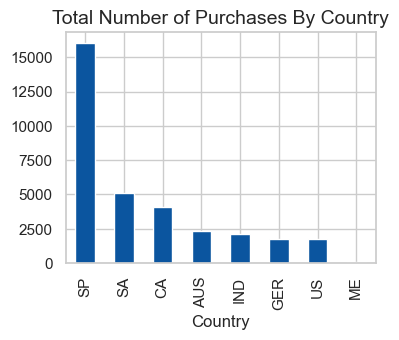

In [38]:
plt.figure(figsize=(4,3))

df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Total Number of Purchases By Country',fontsize=14)

Text(0.5, 1.0, 'Total Amount Spent By Country')

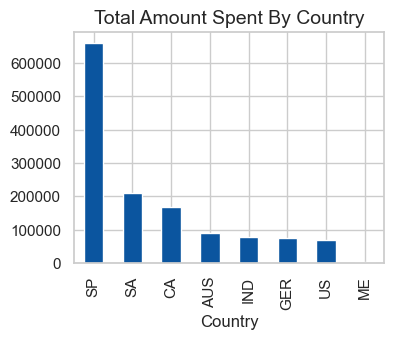

In [39]:
plt.figure(figsize=(4,3))

df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Total Amount Spent By Country',fontsize=14)

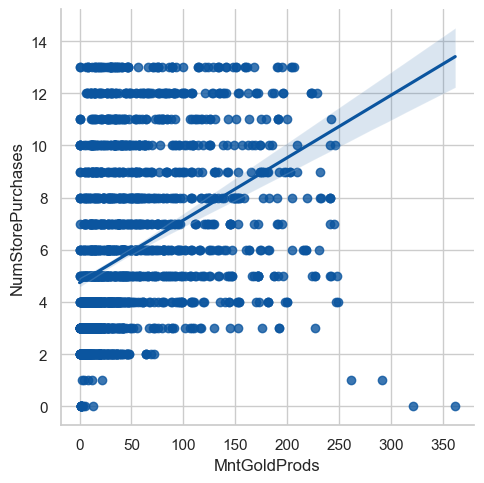

In [40]:
sns.lmplot(y='NumStorePurchases',x='MntGoldProds',data=df)

In [41]:
#Whether the correlation is statistically significant?

import scipy.stats as stats

corr,p_value = stats.kendalltau(df['MntGoldProds'],df['NumStorePurchases'])

print('Kendall correction (tau): ',corr)
print('Kendall p-value: ',p_value)

Kendall correction (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


In [42]:
df_marri_phd = pd.DataFrame(df2[(df2['Education_PhD']==1.0)&(df2['Marital_Status_Married']==1.0)]['MntFishProducts'])
df_marri_phd['Married_PhD'] = 'Married-PhD'

df_marri_other = pd.DataFrame(df2[(df2['Education_PhD']==0.0) | (df2['Marital_Status_Married']==0.0)]['MntFishProducts'])
df_marri_other['Married_PhD'] = 'Other'

In [43]:
df_marri_phd_new = pd.concat([df_marri_other,df_marri_phd],axis=0)
df_marri_phd_new

MntFishProducts  Married_PhD
0                 111        Other
1                   7        Other
2                  15        Other
3                   0        Other
4                  11        Other
...               ...          ...
2194              115  Married-PhD
2199               75  Married-PhD
2202                1  Married-PhD
2203                3  Married-PhD
2236              188  Married-PhD

[2237 rows x 2 columns]

<Axes: xlabel='Married_PhD', ylabel='MntFishProducts'>

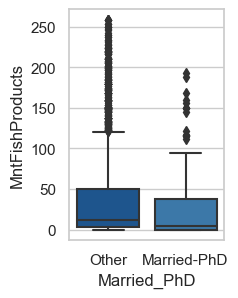

In [44]:
plt.figure(figsize=(2,3))
sns.boxplot(x='Married_PhD',y='MntFishProducts',data=df_marri_phd_new)

In [45]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_marri_phd_new[df_marri_phd_new['Married_PhD']=='Married-PhD']['MntFishProducts'], df_marri_phd_new[df_marri_phd_new['Married_PhD']=='Other']['MntFishProducts'])


print('t-test p-value: ',round(p_value,3))
print('t-test t-test: ',t_stat)

t-test p-value:  0.005
t-test t-test:  -2.7911332066401737


### What other factors are significantly related to amount spent on fish?

Text(0.5, 1.0, 'MntFishProducts Distribution')

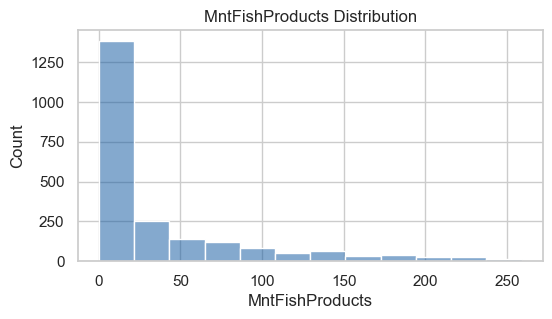

In [46]:
plt.figure(figsize=(6,3))
sns.histplot(x='MntFishProducts',data=df,bins=12,alpha=0.5)
plt.title('MntFishProducts Distribution')

In [47]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns='MntFishProducts')
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  7.583389270441232e-13
Median value of target variable:  12.0


In [48]:
#Identify the features that significantly affect the number of store purchases
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

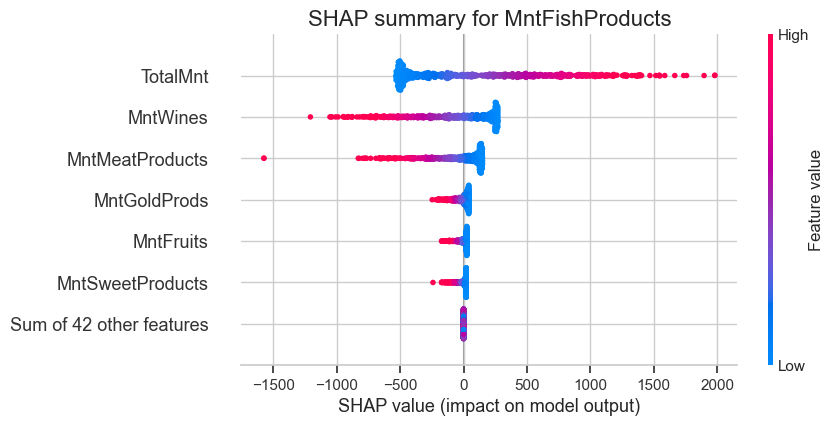

In [49]:
# Explore the directionality of these effects, using SHAP values:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

In [50]:
Feature_FishProd = ['TotalMnt','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds']

In [51]:
df_FishProd_Features = pd.DataFrame()

for i in range(6):
    
    df_tmp = pd.DataFrame(df[[Feature_FishProd[i],'MntFishProducts']])
    
    df_tmp.rename(columns={Feature_FishProd[i]:'Amount'},inplace=True)
    df_tmp['Features'] = Feature_FishProd[i]
        
    df_FishProd_Features = pd.concat([df_FishProd_Features,df_tmp],axis=0)
        
    

In [52]:
df_FishProd_Features

Amount  MntFishProducts      Features
0       1190              111      TotalMnt
1        577                7      TotalMnt
2        251               15      TotalMnt
3         11                0      TotalMnt
4         91               11      TotalMnt
...      ...              ...           ...
2232      78               47  MntGoldProds
2233      16                3  MntGoldProds
2234      14               15  MntGoldProds
2235      63              149  MntGoldProds
2236     144              188  MntGoldProds

[13422 rows x 3 columns]

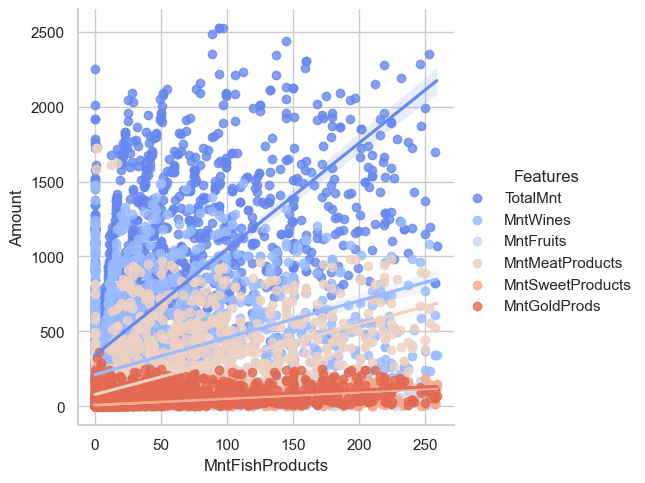

In [53]:
sns.lmplot(x='MntFishProducts',y='Amount',data=df_FishProd_Features,hue='Features',palette='coolwarm')

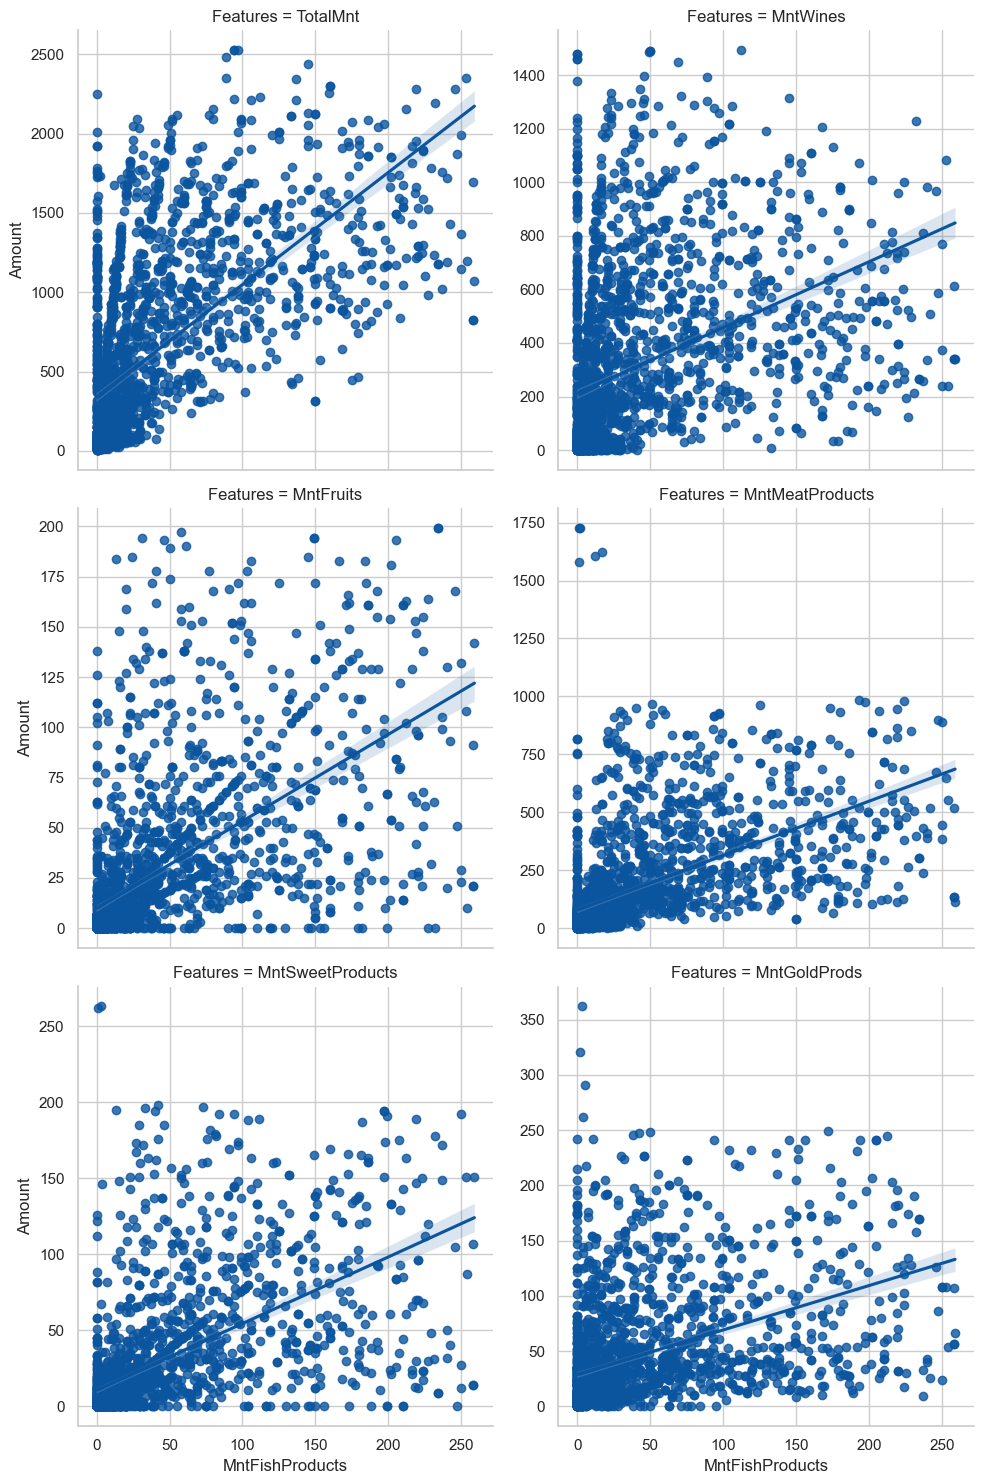

In [54]:
sns.lmplot(x='MntFishProducts',y='Amount',data=df_FishProd_Features,col='Features',col_wrap=2,sharey=False)

### Is there a significant relationship between geographical regional and success of a campaign?

In [55]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [56]:
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## ...so I'm taking my best guess about the largest nations that make sense given the codes provided
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

In [60]:
df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

Country_code  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0             ESP             0             0             0             0   
1             CAN             0             1             0             0   
2             USA             0             0             0             0   
3             AUS             0             0             0             0   
4             ESP             0             0             1             0   
...           ...           ...           ...           ...           ...   
2232          USA             0             0             0             0   
2233          ESP             0             0             0             0   
2234          ESP             0             0             0             0   
2235          IND             0             0             0             0   
2236          CAN             0             0             0             1   

      AcceptedCmp5  Response  
0                0         1  
1                0         1  
2                0         0  
3                0         0  
4                0         1  
...            ...       ...  
2232             0         0  
2233             0         0  
2234             0         0  
2235             0         0  
2236             1         1  

[2237 rows x 7 columns]

In [64]:
# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')

In [65]:
df_cam

Country_code      Campaign  Accepted (%)
0              ESP  AcceptedCmp1             0
1              CAN  AcceptedCmp1             0
2              USA  AcceptedCmp1             0
3              AUS  AcceptedCmp1             0
4              ESP  AcceptedCmp1             0
...            ...           ...           ...
13417          USA      Response             0
13418          ESP      Response             0
13419          ESP      Response             0
13420          IND      Response             0
13421          CAN      Response             1

[13422 rows x 3 columns]

In [66]:
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)
df_cam.head()

Country_code      Campaign  Accepted (%)
0          AUS  AcceptedCmp1         4.375
1          AUS  AcceptedCmp2         0.000
2          AUS  AcceptedCmp3         5.625
3          AUS  AcceptedCmp4         3.750
4          AUS  AcceptedCmp5         8.125

In [67]:
# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

In [68]:
# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

### Statistical summary of regional effects on campaign success:

In [70]:
# Performed logistic regression for Campaign Accepted by Country, 
#reporting Chisq p-value for overall model.

In [71]:
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

In [77]:
## get the data of interest for glm
df_cam_wide = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
 
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
    
#     print(formula,chisq,pval)
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Fri, 02 Jun 2023   Deviance:                       1065.0
Time:                        10:42:26   Pearson chi2:                 2.23e+03
No. Iterations:                    20   Pseudo R-squ. (CS):           0.001563
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

In [79]:
df_cam

Country_code     Campaign  Accepted (%)
0           AUS            1      4.375000
1           AUS            2      0.000000
2           AUS            3      5.625000
3           AUS            4      3.750000
4           AUS            5      8.125000
5           AUS  Most recent     14.375000
6           CAN            1      6.716418
7           CAN            2      2.238806
8           CAN            3      6.716418
9           CAN            4      8.955224
10          CAN            5      7.835821
11          CAN  Most recent     14.179104
12          ESP            1      7.129799
13          ESP            2      1.462523
14          ESP            3      7.586837
15          ESP            4      8.135283
16          ESP            5      8.043876
17          ESP  Most recent     16.087751
18          GER            1      5.833333
19          GER            2      1.666667
20          GER            3      8.333333
21          GER            4      9.166667
22          GER            5      6.666667
23          GER  Most recent     14.166667
24          IND            1      4.761905
25          IND            2      1.360544
26          IND            3      8.843537
27          IND            4      7.482993
28          IND            5      4.081633
29          IND  Most recent      8.843537
30          MEX            1      0.000000
31          MEX            2      0.000000
32          MEX            3     33.333333
33          MEX            4      0.000000
34          MEX            5      0.000000
35          MEX  Most recent     66.666667
36          USA            1      6.422018
37          USA            2      0.000000
38          USA            3      7.339450
39          USA            4      5.504587
40          USA            5      4.587156
41          USA  Most recent     11.926606
42          ZAF            1      5.952381
43          ZAF            2      1.190476
44          ZAF            3      6.250000
45          ZAF            4      5.952381
46          ZAF            5      6.250000
47          ZAF  Most recent     15.476190

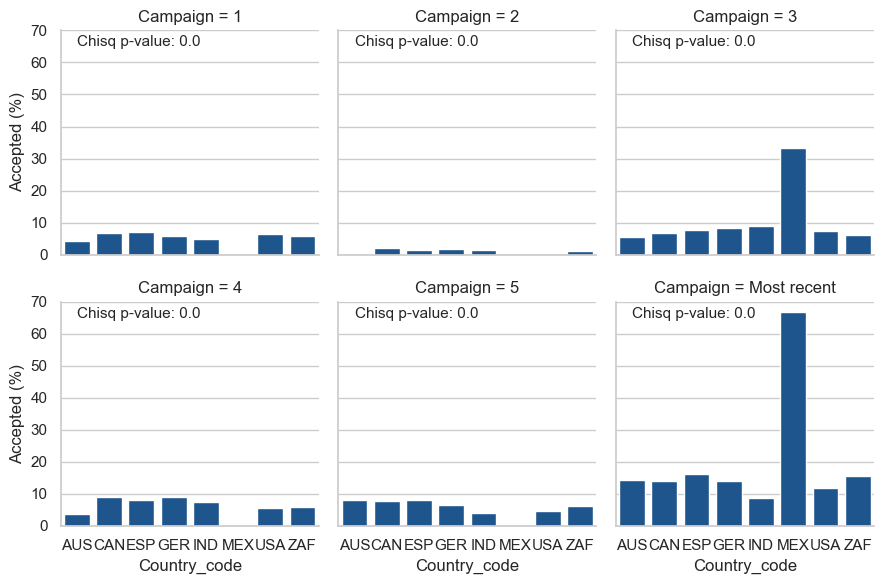

In [87]:
g = sns.FacetGrid(df_cam, col="Campaign",col_wrap=3)
g.map(sns.barplot, "Country_code", "Accepted (%)")

#Add Chisq p-value to each plot
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=11)

## Data Visualization

In [93]:
df_avg = pd.DataFrame(df[['Year_Birth','Year_Customer','Income','Dependents','Kidhome','Teenhome','Recency']].mean().round(1),columns=['Average'])
df_avg

Average
Year_Birth      1968.9
Year_Customer      7.0
Income         52227.4
Dependents         1.0
Kidhome            0.4
Teenhome           0.5
Recency           49.1

[Text(0, 0, '26.3'),
 Text(0, 0, '27.1'),
 Text(0, 0, '37.5'),
 Text(0, 0, '44'),
 Text(0, 0, '166.9'),
 Text(0, 0, '304'),
 Text(0, 0, '605.7')]

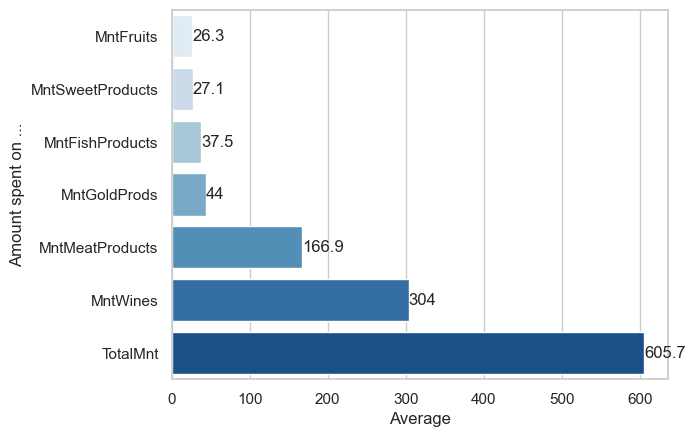

In [132]:
Mnt_col = [col for col in df.columns if 'Mnt' in col]

# for col in df.columns:
#     if 'Mnt' in col:
#         Mnt_col.append(col)
        
df_mnt = pd.DataFrame(df[Mnt_col].mean().round(1) ,columns=['Average']).reset_index()
df_mnt=df_mnt.sort_values('Average',ascending=True)
df_mnt.rename(columns={'index':'Amount spent on ...'},inplace=True)


ax = sns.barplot(x='Average',y='Amount spent on ...',data=df_mnt,orient='h',palette='Blues')
ax.bar_label(ax.containers[0])

# ## add text labels for each bar's value
# for p,q in zip(ax.patches, df_mnt['Average']):
#     ax.text(x=q+40,
#             y=p.get_y()+0.5,
#             s=q,
#             ha="center") ;


### Which channels are underperforming?


In [141]:
Channel_col=[]
Channel_col = [col for col in df.columns if 'Purchases' in col]
Channel_col = Channel_col + ['TotalCampaignAcc','NumWebVisitsMonth']
print(Channel_col)

['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'TotalPurchases', 'TotalCampaignAcc', 'NumWebVisitsMonth']


In [142]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970  Graduation       Divorced  84835.0        0         0   
1           1961  Graduation         Single  57091.0        0         0   
2           1958  Graduation        Married  67267.0        0         1   
3           1967  Graduation       Together  32474.0        1         1   
4           1989  Graduation         Single  21474.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1976         PhD       Divorced  66476.0        0         1   
2233        1977    2n Cycle        Married  31056.0        1         0   
2234        1976  Graduation       Divorced  46310.0        1         0   
2235        1978  Graduation        Married  65819.0        0         0   
2236        1969         PhD        Married  94871.0        0         2   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0           0       189        104              379              111   
1           0       464          5               64                7   
2           0       134         11               59               15   
3           0        10          0                1                0   
4           0         6         16               24               11   
...       ...       ...        ...              ...              ...   
2232       99       372         18              126               47   
2233       99         5         10               13                3   
2234       99       185          2               88               15   
2235       99       267         38              701              149   
2236       99       169         24              553              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2232                48            78                  2                5   
2233                 8            16                  1                1   
2234                 5            14                  2                6   
2235               165            63                  1                5   
2236                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                       4                  6                  1             0   
1                       3                  7                  5             0   
2                       2                  5                  2             0   
3                       0                  2                  7             0   
4                       1                  2                  7             1   
...                   ...                ...                ...           ...   
2232                    2                 11                  4             0   
2233                    0                  3                  8             0   
2234                    1                  5                  8             0   
2235                    4                 10                  3             0   
2236                    5                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0                0             0             0             0         1   
1                0             0             0             1         1   
2                0             0             0             0         0   
3                0             0             0            

[Text(0, 0, '0.4'),
 Text(0, 0, '2.3'),
 Text(0, 0, '2.7'),
 Text(0, 0, '4.1'),
 Text(0, 0, '5.3'),
 Text(0, 0, '5.8'),
 Text(0, 0, '14.9')]

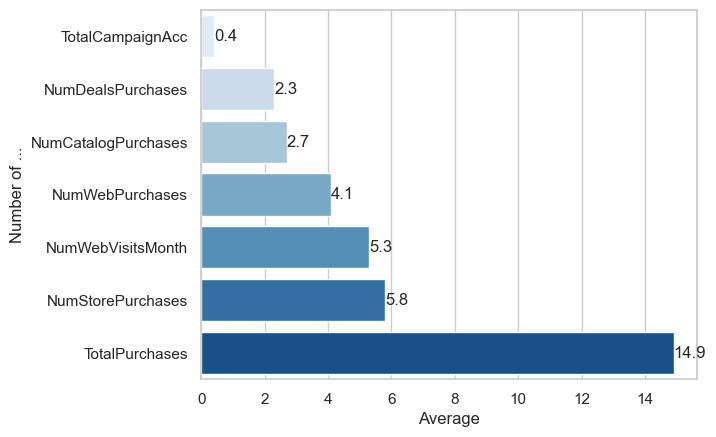

In [143]:
df_chan = pd.DataFrame(df[Channel_col].mean().round(1) ,columns=['Average']).reset_index()
df_chan=df_chan.sort_values('Average',ascending=True)
df_chan.rename(columns={'index':'Number of ...'},inplace=True)


ax = sns.barplot(x='Average',y='Number of ...',data=df_chan,orient='h',palette='Blues')
ax.bar_label(ax.containers[0])
